# Regression Metrics  -------------------->

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('placement2.csv')

In [88]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package( in lpa )')

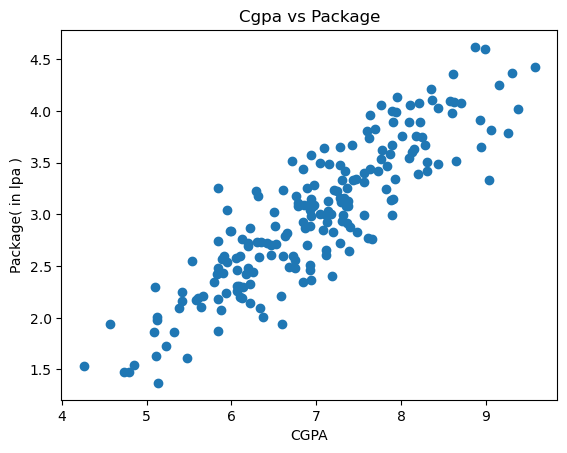

In [90]:
plt.scatter(df['cgpa'],df['package'])
plt.title('Cgpa vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package( in lpa )')

In [159]:
X = df.iloc[:,0:1]

# y = df.iloc[:,1]
y = df.iloc[:,-1]

# y = df.iloc[:,1:2]

In [161]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [163]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [165]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [100]:
X_train.shape

(160,)

In [102]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()

In [167]:
lr.fit(X_train , y_train)

LinearRegression()

Text(0, 0.5, 'Package( in lpa )')

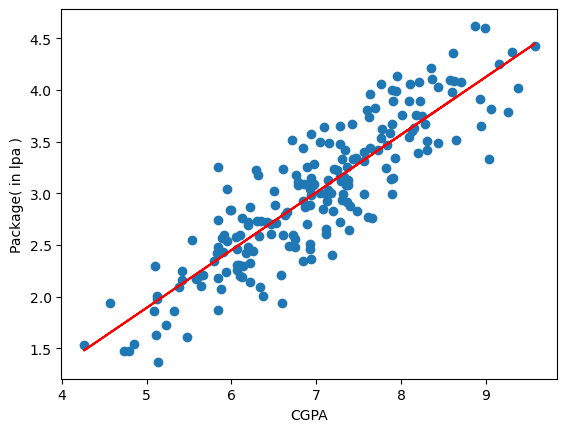

In [169]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train , lr.predict(X_train) , color ='red')
plt.xlabel('CGPA')
plt.ylabel('Package( in lpa )')

In [44]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [175]:
y_pred = lr.predict(X_test)

In [177]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [173]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

# Mean Absolute Error 

In [182]:
print("MAE :", mean_absolute_error(y_test,y_pred))
# So 0.28 lpa ki glti kar rha hai Model

MAE : 0.2884710931878175


# Mean Squared Error 

In [192]:
print("MSE :", mean_squared_error(y_test,y_pred))
# Result is not in lpa

MSE : 0.12129235313495527


# Root Mean Absolute Error 

In [194]:
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_pred)) )
# Result in Lpa

RMSE : 0.34827051717731616


# R2 score --------------------------->

In [205]:
print("R2 score :", r2_score(y_test,y_pred))

r2 = r2_score(y_test,y_pred)

# Iska matlab hai ki Cgpa column explain 78% variance on package column

R2 score : 0.780730147510384


# Adjusted R2 score

In [225]:
n = X_test.shape # No. of Rows 
k = X_test.shape[1]

In [221]:
n

(40, 1)

In [227]:
k

1

In [233]:
adjusted_r2 = 1 - (((1-r2)*(40-1))/(40-1-1))

In [235]:
adjusted_r2

0.7749598882343415

In [253]:
new_df = df.copy()

new_df['random_feature'] = np.random.random(200)
new_df = new_df[['cgpa','random_feature','package']]

new_df.head()

,cgpa,random_feature,package
0,6.89,0.070970,3.26
1,5.12,0.814479,1.98
2,7.82,0.974946,3.25
3,7.42,0.231052,3.67
4,6.94,0.186779,3.57


Text(0, 0.5, 'Package( in lpa )')

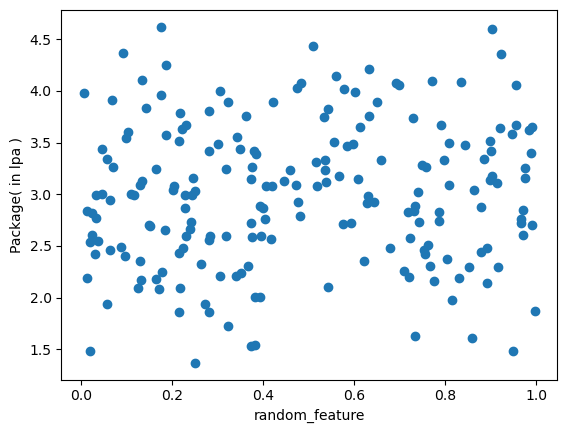

In [255]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package( in lpa )')

In [297]:
X = new_df.iloc[:,0:1]

# y = df.iloc[:,1]
y = new_df.iloc[:,-1]

In [299]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [301]:
lr = LinearRegression()

In [303]:
lr.fit(X_train,y_train)

LinearRegression()

In [305]:
y_pred = lr.predict(X_test)

In [307]:
print("R2 Score: ",r2_score(y_test , y_pred))

r2 = r2_score(y_test , y_pred)

R2 Score:  0.780730147510384


In [309]:
adjusted_r2 = 1 - (((1-r2)*(40-1))/(40-1-2))

In [311]:
adjusted_r2

0.7688777230514858

In [289]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

new_df2.head()

,cgpa,iq,package
0,6.89,3.76,3.26
1,5.12,2.18,1.98
2,7.82,3.75,3.25
3,7.42,3.37,3.67
4,6.94,3.67,3.57


Text(0, 0.5, 'Package( in lpa )')

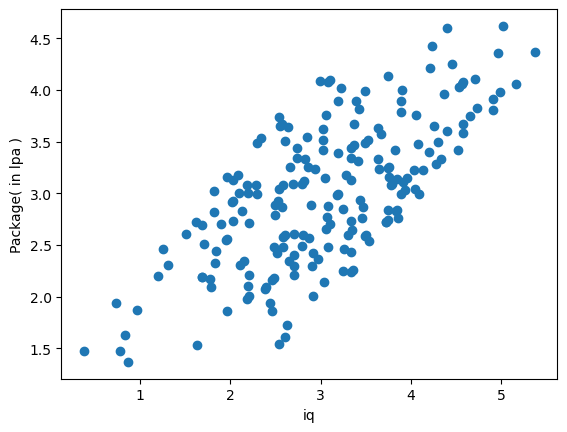

In [291]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package( in lpa )')

In [315]:
X = new_df2.iloc[:,0:2]

# y = df.iloc[:,1]
y = new_df2.iloc[:,-1]

In [317]:
X

,cgpa,iq
0,6.89,3.76
1,5.12,2.18
2,7.82,3.75
3,7.42,3.37
4,6.94,3.67
...,...,...
195,6.93,3.26
196,5.89,2.87
197,7.21,3.64
198,7.63,4.36


In [319]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [333]:
lr = LinearRegression()


In [335]:
lr.fit(X_train,y_train)

LinearRegression()

In [337]:
y_pred = lr.predict(X_test)

In [339]:
print("R2 Score: ",r2_score(y_test , y_pred))

r2 = r2_score(y_test , y_pred)

R2 Score:  0.8052535239694782


In [341]:
adjusted_r2 = 1 - (((1-r2)*(40-1))/(40-1-2))

In [343]:
adjusted_r2

0.7947266874272879